<a href="https://colab.research.google.com/github/soham2710/Iris-Ensemble-Learning/blob/main/Iris_Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

**Iris Dataset:**

The Iris dataset is a well-known dataset in machine learning and consists of 150 samples from three different species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). For each sample, four features are measured: the length and width of the sepals and petals in centimeters.


---


Code Explanation:


1.   Import necessary libraries: Import the required libraries, including NumPy, scikit-learn, XGBoost, and ensemble learning-related modules.

2.   Load the Iris dataset: We load the Iris dataset using scikit-learn's load_iris function. The dataset contains the features (X) and labels (y).

3. Split the data: We split the data into training and testing sets using train_test_split from scikit-learn. This allows us to train our models on one set of data and test their performance on another.



4. Define individual models:

* **Random Forest (rf_model)**: Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions. It's known for its robustness and can handle both classification and regression tasks.

* **XGBoost (xgb_model)**: XGBoost is a gradient boosting algorithm that is highly popular for its performance and speed. It builds an ensemble of decision trees sequentially, where each new tree corrects the errors made by the previous ones.

* **AdaBoost (ada_model)**: AdaBoost is another boosting algorithm that combines multiple weak learners (typically decision trees) to create a strong learner. It gives more weight to the misclassified samples in each iteration, improving the model's accuracy.


5. Create a Voting Classifier (voting_model): The Voting Classifier combines the predictions of multiple individual models by taking a majority vote (hard voting) or averaging predicted probabilities (soft voting). In this code, we use soft voting, which works well when the individual models provide class probabilities.

6. Stacking is an ensemble technique that combines multiple models (base models) into a final meta-model (the final estimator). The stacking_model in the code uses Logistic Regression as the final estimator.

7. Evaluate individual models: For each individual model (Random Forest, XGBoost, AdaBoost), we use k-fold cross-validation to assess their performance. Cross-validation provides an estimate of the model's accuracy on unseen data and helps detect overfitting.

8. Train and evaluate the Voting Classifier: The Voting Classifier is trained on the training data and evaluated on the testing data using accuracy_score. The soft voting method is used, where it combines predicted class probabilities.

9. Train and evaluate the Stacking Classifier:
The Stacking Classifier is trained on the training data and evaluated on the testing data using accuracy_score. The stacking ensemble combines the predictions of base models to make final predictions.


*The purpose of ensemble techniques is to improve predictive performance by combining the strengths of multiple models. Random Forest, XGBoost, and AdaBoost are some of the most popular ensemble techniques, each with its unique approach to combining models. Voting combines multiple models by voting, and stacking builds a meta-model to make the final decision. The choice of the best ensemble technique often depends on the specific problem and dataset.*

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
voting_model = VotingClassifier(estimators=[('RandomForest', rf_model), ('XGBoost', xgb_model), ('AdaBoost', ada_model)], voting='soft')

# Stacking ensemble
stacking_models = [
    ('RandomForest', rf_model),
    ('XGBoost', xgb_model),
    ('AdaBoost', ada_model)
]
stacking_model = StackingClassifier(estimators=stacking_models, final_estimator=LogisticRegression())

# Evaluate individual models
models = [rf_model, xgb_model, ada_model, voting_model, stacking_model]
model_names = ["Random Forest", "XGBoost", "AdaBoost", "Voting", "Stacking"]

for model, model_name in zip(models, model_names):
    kfold = KFold(n_splits=5)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{model_name} - Mean Accuracy: {results.mean()}")

# Train and evaluate the Voting Classifier
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Train and evaluate the Stacking Classifier
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")

Random Forest - Mean Accuracy: 0.9333333333333333
XGBoost - Mean Accuracy: 0.9333333333333333
AdaBoost - Mean Accuracy: 0.9333333333333332
Voting - Mean Accuracy: 0.95
Stacking - Mean Accuracy: 0.95
Voting Classifier Accuracy: 1.0
Stacking Classifier Accuracy: 1.0


# Plotting The Data

Importing Necessary Libraries: The code starts by importing the required libraries, which include matplotlib.pyplot for creating plots.

Model Names and Accuracies: The code defines the names of the models (model_names) and an empty list to store their corresponding accuracies (accuracies).

Loop Over Models: The code iterates through the models, both individual models and ensemble models, using a for loop. For each model, it performs the following steps:

Inside the loop, it uses k-fold cross-validation (with k=5) to evaluate the model's performance (cross_val_score). This calculates the accuracy for each fold and then computes the mean accuracy across all folds.

The mean accuracy is appended to the accuracies list.

Voting and Stacking Models: After evaluating all models, the code adds the accuracies of the Voting Classifier and Stacking Classifier to the accuracies list.

Model Names for Voting and Stacking: It also appends the model names "Voting Classifier" and "Stacking Classifier" to the model_names list for the ensemble models.

Creating a Bar Plot: Using matplotlib.pyplot, the code creates a bar plot to visualize the model accuracies. Here's what each function in the plot section does:

plt.bar(model_names, accuracies, color=...): This function creates a bar plot with model names on the x-axis and their corresponding accuracies on the y-axis. It also specifies the colors for the bars.

plt.xlabel('Models') and plt.ylabel('Mean Accuracy'): These functions set labels for the x-axis and y-axis, respectively.

plt.title('Model Accuracies'): Sets the title for the plot.

plt.xticks(rotation=45): Rotates the x-axis labels by 45 degrees for better readability.

plt.ylim(0.8, 1.0): Sets the y-axis limits to control the range of accuracy values shown on the plot.

Displaying Accuracy Values on Bars: The code uses plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center') to display the accuracy values on top of the bars. i represents the x-coordinate of the bar, acc is the accuracy value, and f'{acc:.2f}' formats the accuracy value to two decimal places. ha='center' specifies that the text should be centered horizontally on top of the bar.

Displaying the Plot: Finally, plt.show() is used to display the plot.


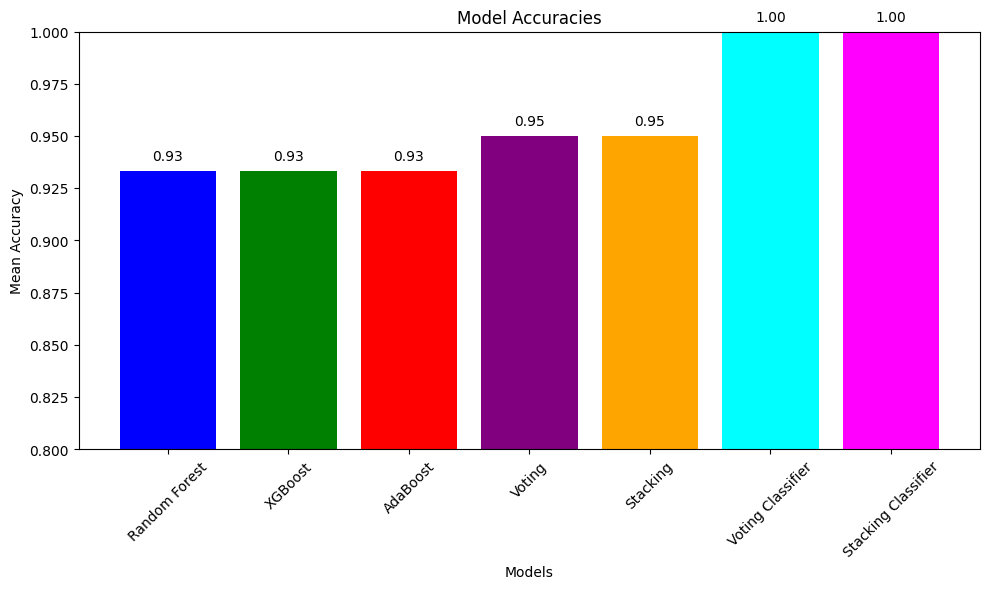

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ["Random Forest", "XGBoost", "AdaBoost", "Voting", "Stacking"]
accuracies = []

for model in models:
    kfold = KFold(n_splits=5)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    accuracies.append(results.mean())

# Add the accuracy of the Voting and Stacking models
accuracies.append(voting_accuracy)
accuracies.append(stacking_accuracy)
model_names.append("Voting Classifier")
model_names.append("Stacking Classifier")

# Create a bar plot to visualize model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # You can adjust the y-axis limits as needed

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center')

plt.tight_layout()
plt.show()